<a href="https://colab.research.google.com/github/MamidiPravallikaReddy/ML-LAB/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/house_price_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
print(df.isnull().sum())

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 246, dtype: int64


In [19]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [20]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [21]:
target_column = "SalePrice"
y = df[target_column].values.reshape(-1,1)
X = df.drop(columns=[target_column])


In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]


In [23]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n,1))
    cost_history = []

    for i in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = (1/m) * X.T.dot(error)
        theta = theta - learning_rate * gradient
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history


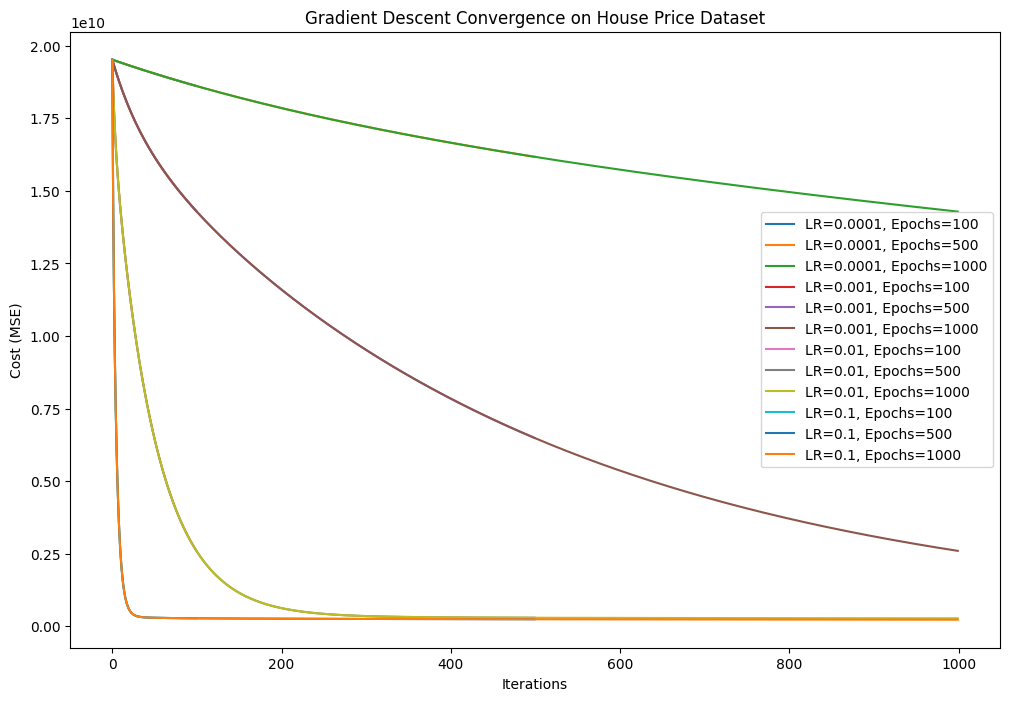

In [24]:
import matplotlib.pyplot as plt

learning_rates = [0.0001, 0.001, 0.01, 0.1]
epochs = [100, 500, 1000]

plt.figure(figsize=(12,8))

for lr in learning_rates:
    for ep in epochs:
        theta, cost_history = gradient_descent(X_scaled, y, learning_rate=lr, epochs=ep)
        plt.plot(cost_history, label=f"LR={lr}, Epochs={ep}")

plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence on House Price Dataset")
plt.legend()
plt.show()


In [25]:

theta, _ = gradient_descent(X_scaled, y, learning_rate=0.01, epochs=1000)

y_pred = X_scaled.dot(theta)
print("Actual Prices:", y[:5].flatten())
print("Predicted Prices:", y_pred[:5].flatten())


Actual Prices: [208500 181500 223500 140000 250000]
Predicted Prices: [210241.92532569 201363.56437428 208721.37202982 175051.41101163
 302372.177397  ]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


In [27]:
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3*np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])


In [28]:
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)


In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.993e+01, tolerance: 2.817e-02
  model = cd_fast.enet_coordinate_descent(


In [30]:
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

print("\nNumber of Non-zero Coefficients:")
print("Linear:", np.sum(lin_reg.coef_ != 0))
print("Ridge :", np.sum(ridge.coef_ != 0))
print("Lasso :", np.sum(lasso.coef_ != 0))

print("\nCoefficients (first 10):")
print("Linear:", lin_reg.coef_[:10])
print("Ridge :", ridge.coef_[:10])
print("Lasso :", lasso.coef_[:10])


Linear Regression MSE: 0.33569746517543764
Ridge Regression MSE: 0.2564105557929059
Lasso Regression MSE: 0.8340842762996706

Number of Non-zero Coefficients:
Linear: 15
Ridge : 15
Lasso : 14

Coefficients (first 10):
Linear: [ 0.          0.00051191  0.00131155  0.00266982  0.00450027  0.00567652
  0.0034758  -0.0036129  -0.00691386  0.00641681]
Ridge : [ 0.          0.13794497  0.14708802  0.14123494  0.10479704  0.01775273
 -0.08233243 -0.06081005  0.09367069 -0.04514836]
Lasso : [ 0.00000000e+00  0.00000000e+00 -4.12992014e-01 -2.26815164e-02
  1.31254425e-02  3.16725070e-04 -2.70842603e-05 -4.44382082e-06
 -3.95418236e-07 -2.64230132e-08]


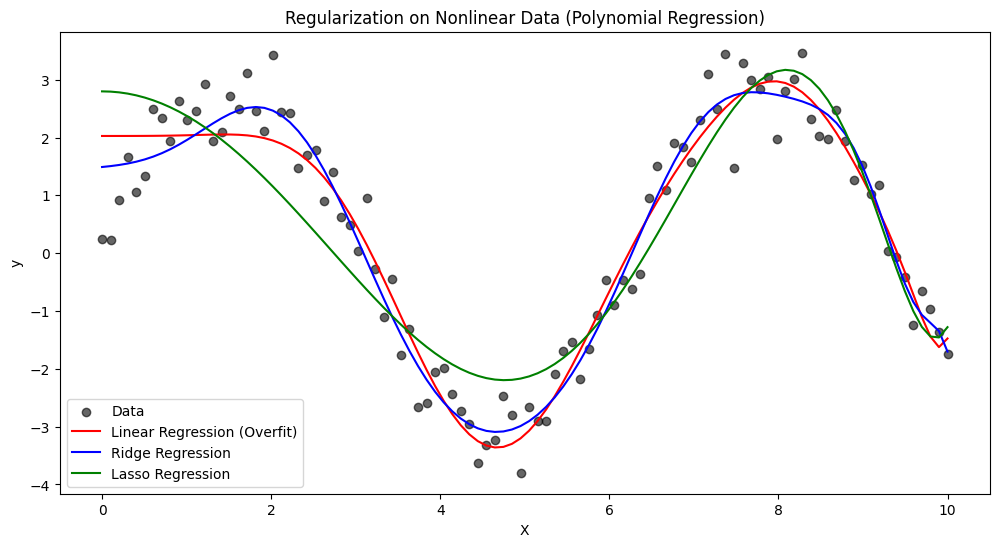

In [31]:
y_pred_full_lr = lin_reg.predict(X_poly)
y_pred_full_ridge = ridge.predict(X_poly)
y_pred_full_lasso = lasso.predict(X_poly)

plt.figure(figsize=(12,6))
plt.scatter(X, y, color="black", label="Data", alpha=0.6)

plt.plot(X, y_pred_full_lr, label="Linear Regression (Overfit)", color="red")
plt.plot(X, y_pred_full_ridge, label="Ridge Regression", color="blue")
plt.plot(X, y_pred_full_lasso, label="Lasso Regression", color="green")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Regularization on Nonlinear Data (Polynomial Regression)")
plt.legend()
plt.show()
